In this notebook I reconstruct images using one autoencoder trained to reconstruct bare soil. Images have been obtained from GEE --> Landsat 7: monthly composite during one year and bands:  'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'.

In [7]:
base_path = '/home/clara'  # '/cats/datastore3/claraenv/code/my-projects/'  # '/home/clara/Documents/'

# Libraries

In [4]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip
from random import randint
import math
import re
import random

'''Data Viz'''
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import matplotlib.cm as cm
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import joblib 

'''TensorFlow and Keras'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model, load_model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

from osgeo import gdal
from osgeo import gdal_array
import matplotlib.pyplot as plt
import numpy as np
import sys
from osgeo.gdalconst import *
import os

import math
import codecs

import osgeo #this is necessary for the type comparison in some methods
from osgeo import osr
from osgeo import ogr
from collections import defaultdict
import itertools
from osgeo import gdal_array as gdar
from osgeo import gdalconst as gdct
import glob

# Functions

In [9]:
def is_leap_year(year):
    """ if year is a leap year return True
        else return False """
    if year % 100 == 0:
        return year % 400 == 0
    return year % 4 == 0

def doy(Y,M,D):
    """ given year, month, day return day of year
        Astronomical Algorithms, Jean Meeus, 2d ed, 1998, chap 7 """
    if is_leap_year(Y):
        K = 1
    else:
        K = 2
    N = int((275 * M) / 9.0) - K * int((M + 9) / 12.0) + D - 30
    return N
def scale_MinMax (array, model_filepath, scaler_name):
    
    # Create scaler and scale
    scaler = pp.MinMaxScaler()
    array_scaled = scaler.fit_transform(array)
    
    #Create new folder and save
    mf_scaler = os.path.join(model_filepath, scaler_name)
    if not os.path.exists(mf_scaler):
        os.mkdir(mf_scaler) 
    
    joblib.dump(scaler, mf_scaler + '/scale.mod')
    
    return array_scaled

# RECONSTRUCT TRAINING DATA

In [37]:
scalers = os.path.join(model_filepath, 'Scalers')
reconstruction = []

for ae in list(range(n_clusters)):
    
    # Upload models
    mf = f'{model_filepath}/Autoencoder_{ae}/'
    model = keras.models.load_model(mf)
    scaler_cluster = joblib.load(scalers + f'/Scaler_{cluster}/scale.mod')
    
    # Scale
    trainScaled_AE = scaler_cluster.transform(train_AE)
    
    ## Prediction
    print(f'Predicting autoencoder {ae}...')
    start_p = time.time()
    recScaled_AE = model.predict(x=trainScaled_AE, verbose=1)
    
    # Descale
    reconstruction_AE = scaler_cluster.inverse_transform(recScaled_AE)
    
    # Convert to original shape
    reconstruction_cluster = reconstruction_AE.transpose()
    reconstruction_cluster = reconstruction_cluster.reshape(training.shape[1], training.shape[0], training.shape[2], training.shape[3])
    images = []
    for img in range(training.shape[0]):
        bands_img = []
        for b in range(training.shape[1]):
            band = reconstruction_cluster[b, img, :, :]
            bands_img.append(band)
        images.append(bands_img)
    reconstruction_cluster = np.array(images)
    reconstruction.append(reconstruction_cluster)
    end_p = time.time()
    print(f'Prediction time AE_{ae} ---minutes--- {(end_p-start_p)/60}')

reconstruction = np.array(reconstruction)

Predicting autoencoder 0...
78998/78998 [==============================] - 80s 1ms/step
Prediction time AE_0 ---minutes--- 1.3769303242365518
Predicting autoencoder 1...
78998/78998 [==============================] - 65s 825us/step
Prediction time AE_1 ---minutes--- 1.1001774668693542
Predicting autoencoder 2...
78998/78998 [==============================] - 83s 1ms/step
Prediction time AE_2 ---minutes--- 1.391375994682312
Predicting autoencoder 3...
78998/78998 [==============================] - 72s 916us/step
Prediction time AE_3 ---minutes--- 1.2186731338500976
Predicting autoencoder 4...
78998/78998 [==============================] - 61s 765us/step
Prediction time AE_4 ---minutes--- 1.0201931873957315
Predicting autoencoder 5...
78998/78998 [==============================] - 67s 853us/step
Prediction time AE_5 ---minutes--- 1.1358412384986878
Predicting autoencoder 6...
78998/78998 [==============================] - 65s 821us/step
Prediction time AE_6 ---minutes--- 1.09482143322626

**SHOW PIXEL RECONSTRUCTION (MOST REPRESENTATIVE PIXEL PER CLUSTER)**

-------------------------------------------------------------------------------------------
                                    CLUSTER 0 --- AUTOENCODER 0
    ------------------------------------------------------------------------------------------------------


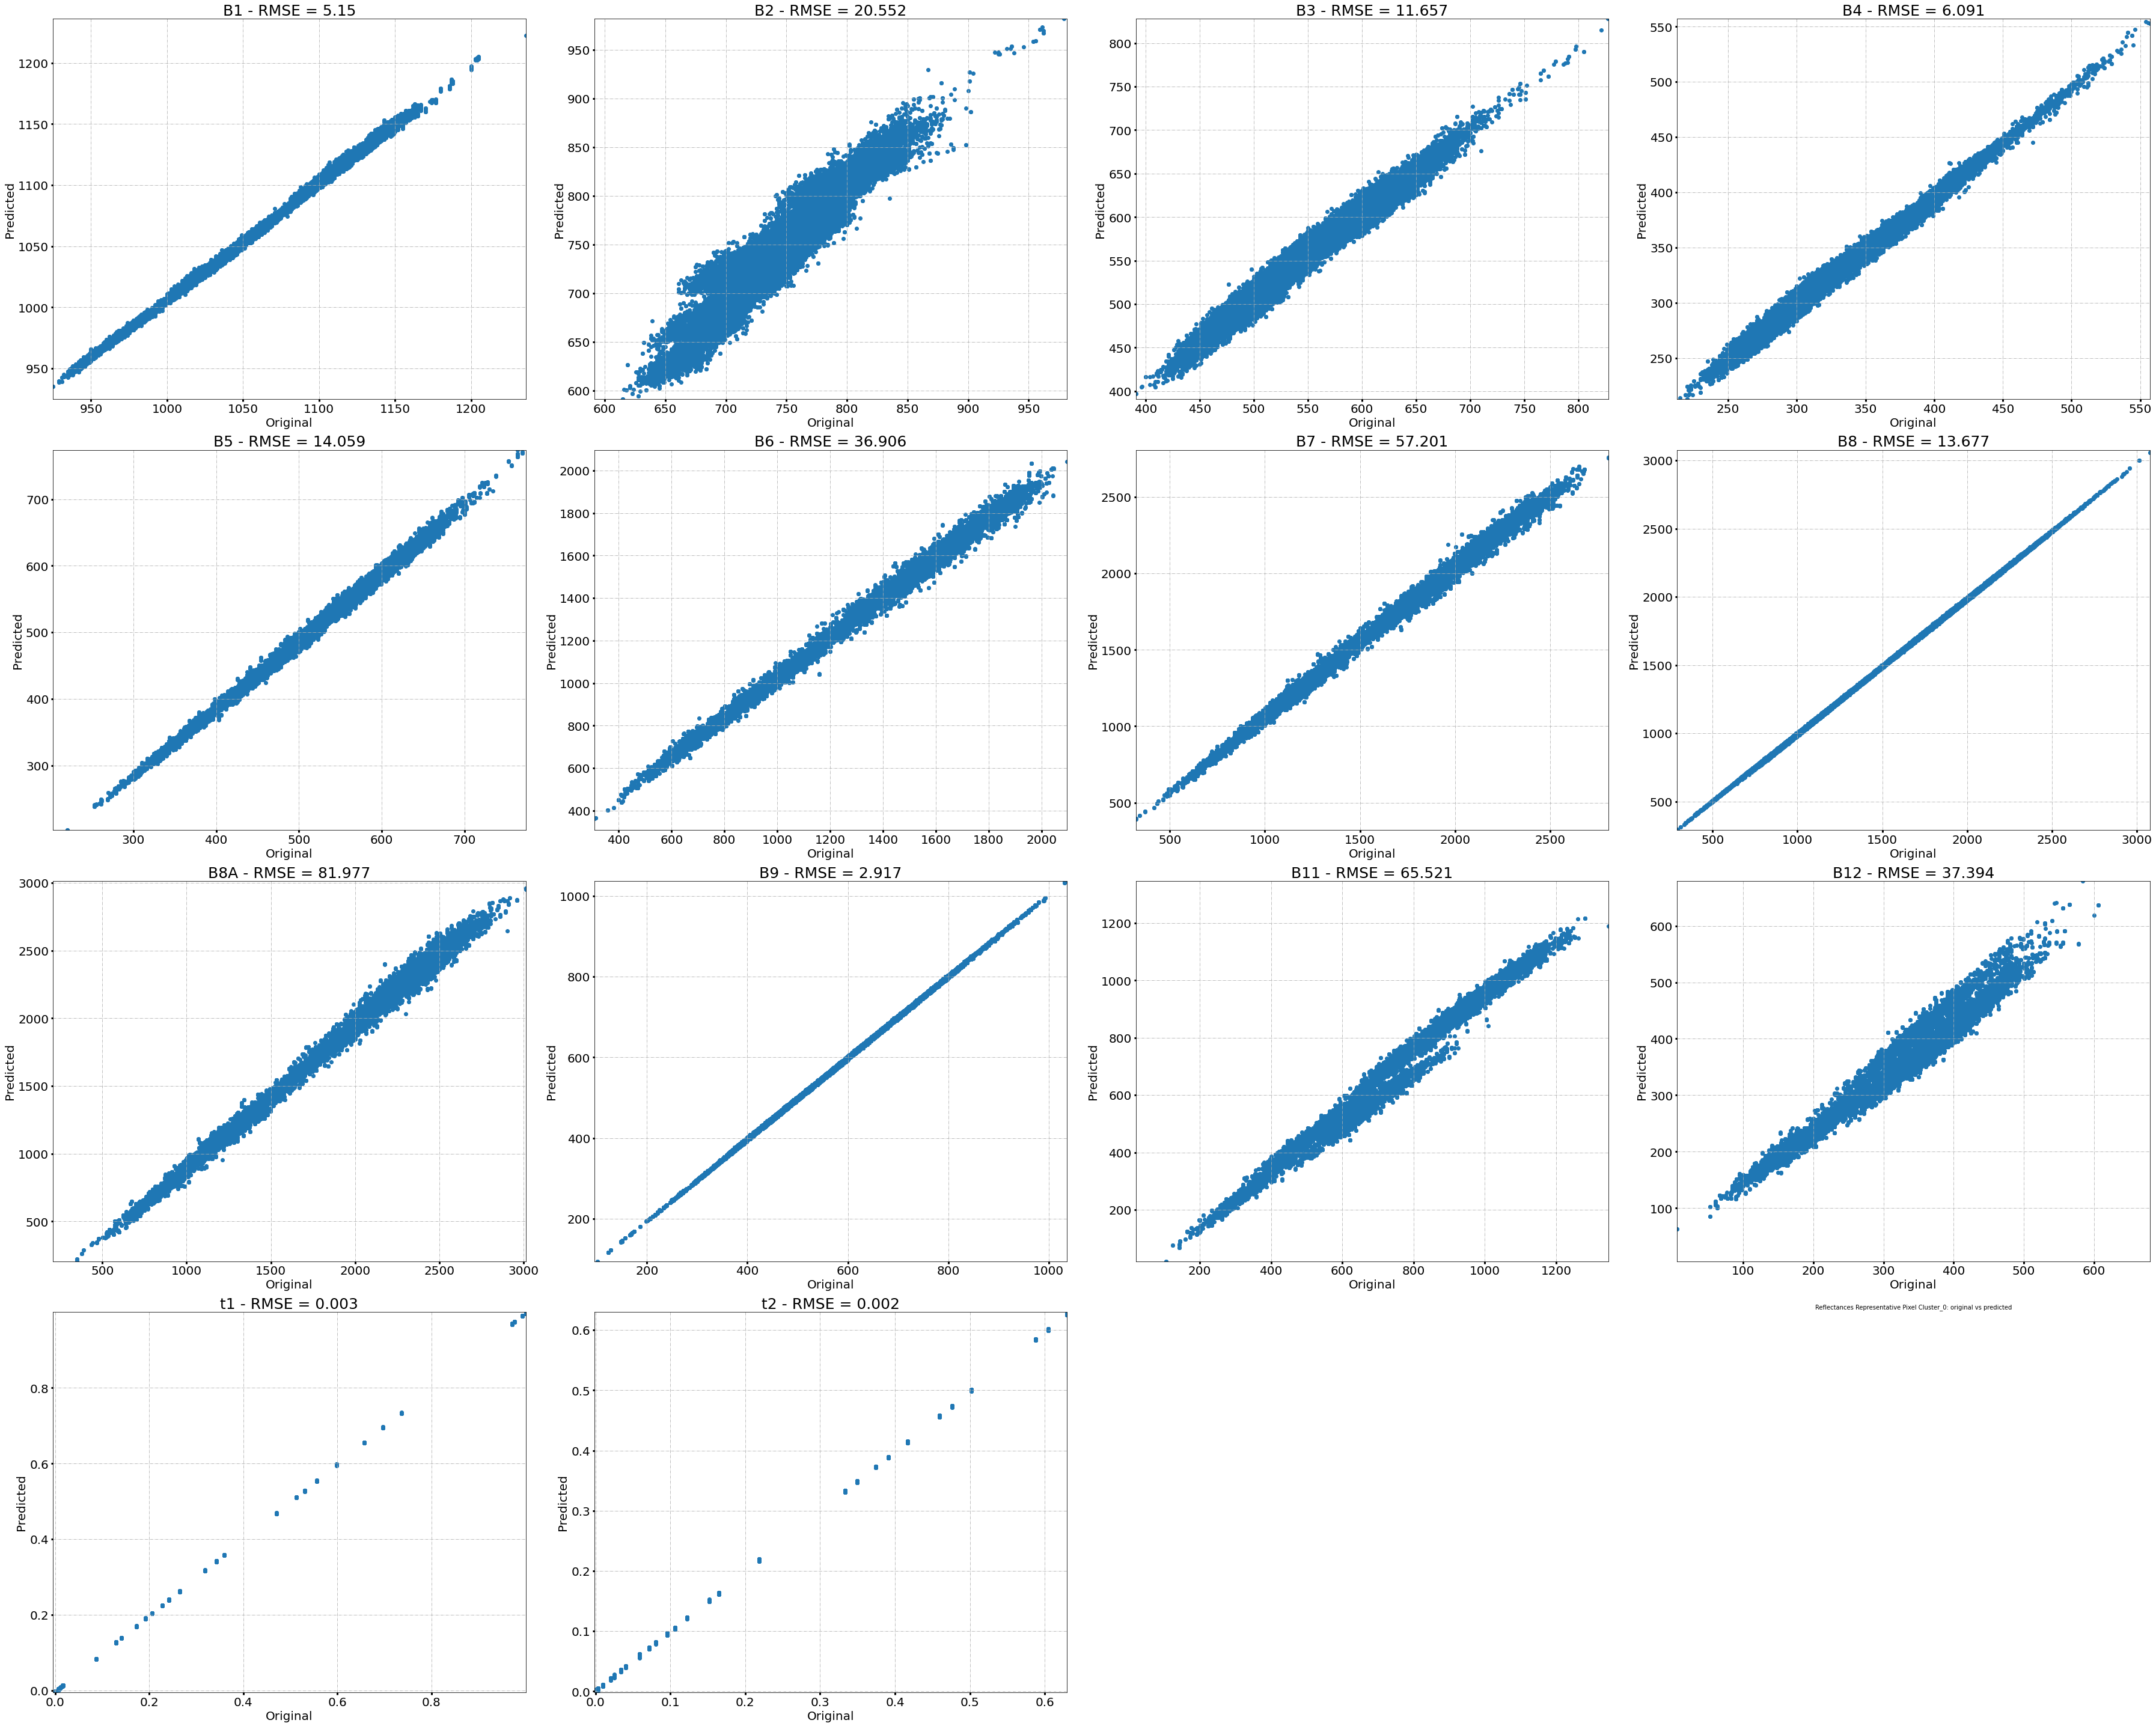

Sum RMSE all bands...
Total RMSE autoencoder 0: 353.107
-------------------------------------------------------------------------------------------
                                    CLUSTER 1 --- AUTOENCODER 1
    ------------------------------------------------------------------------------------------------------


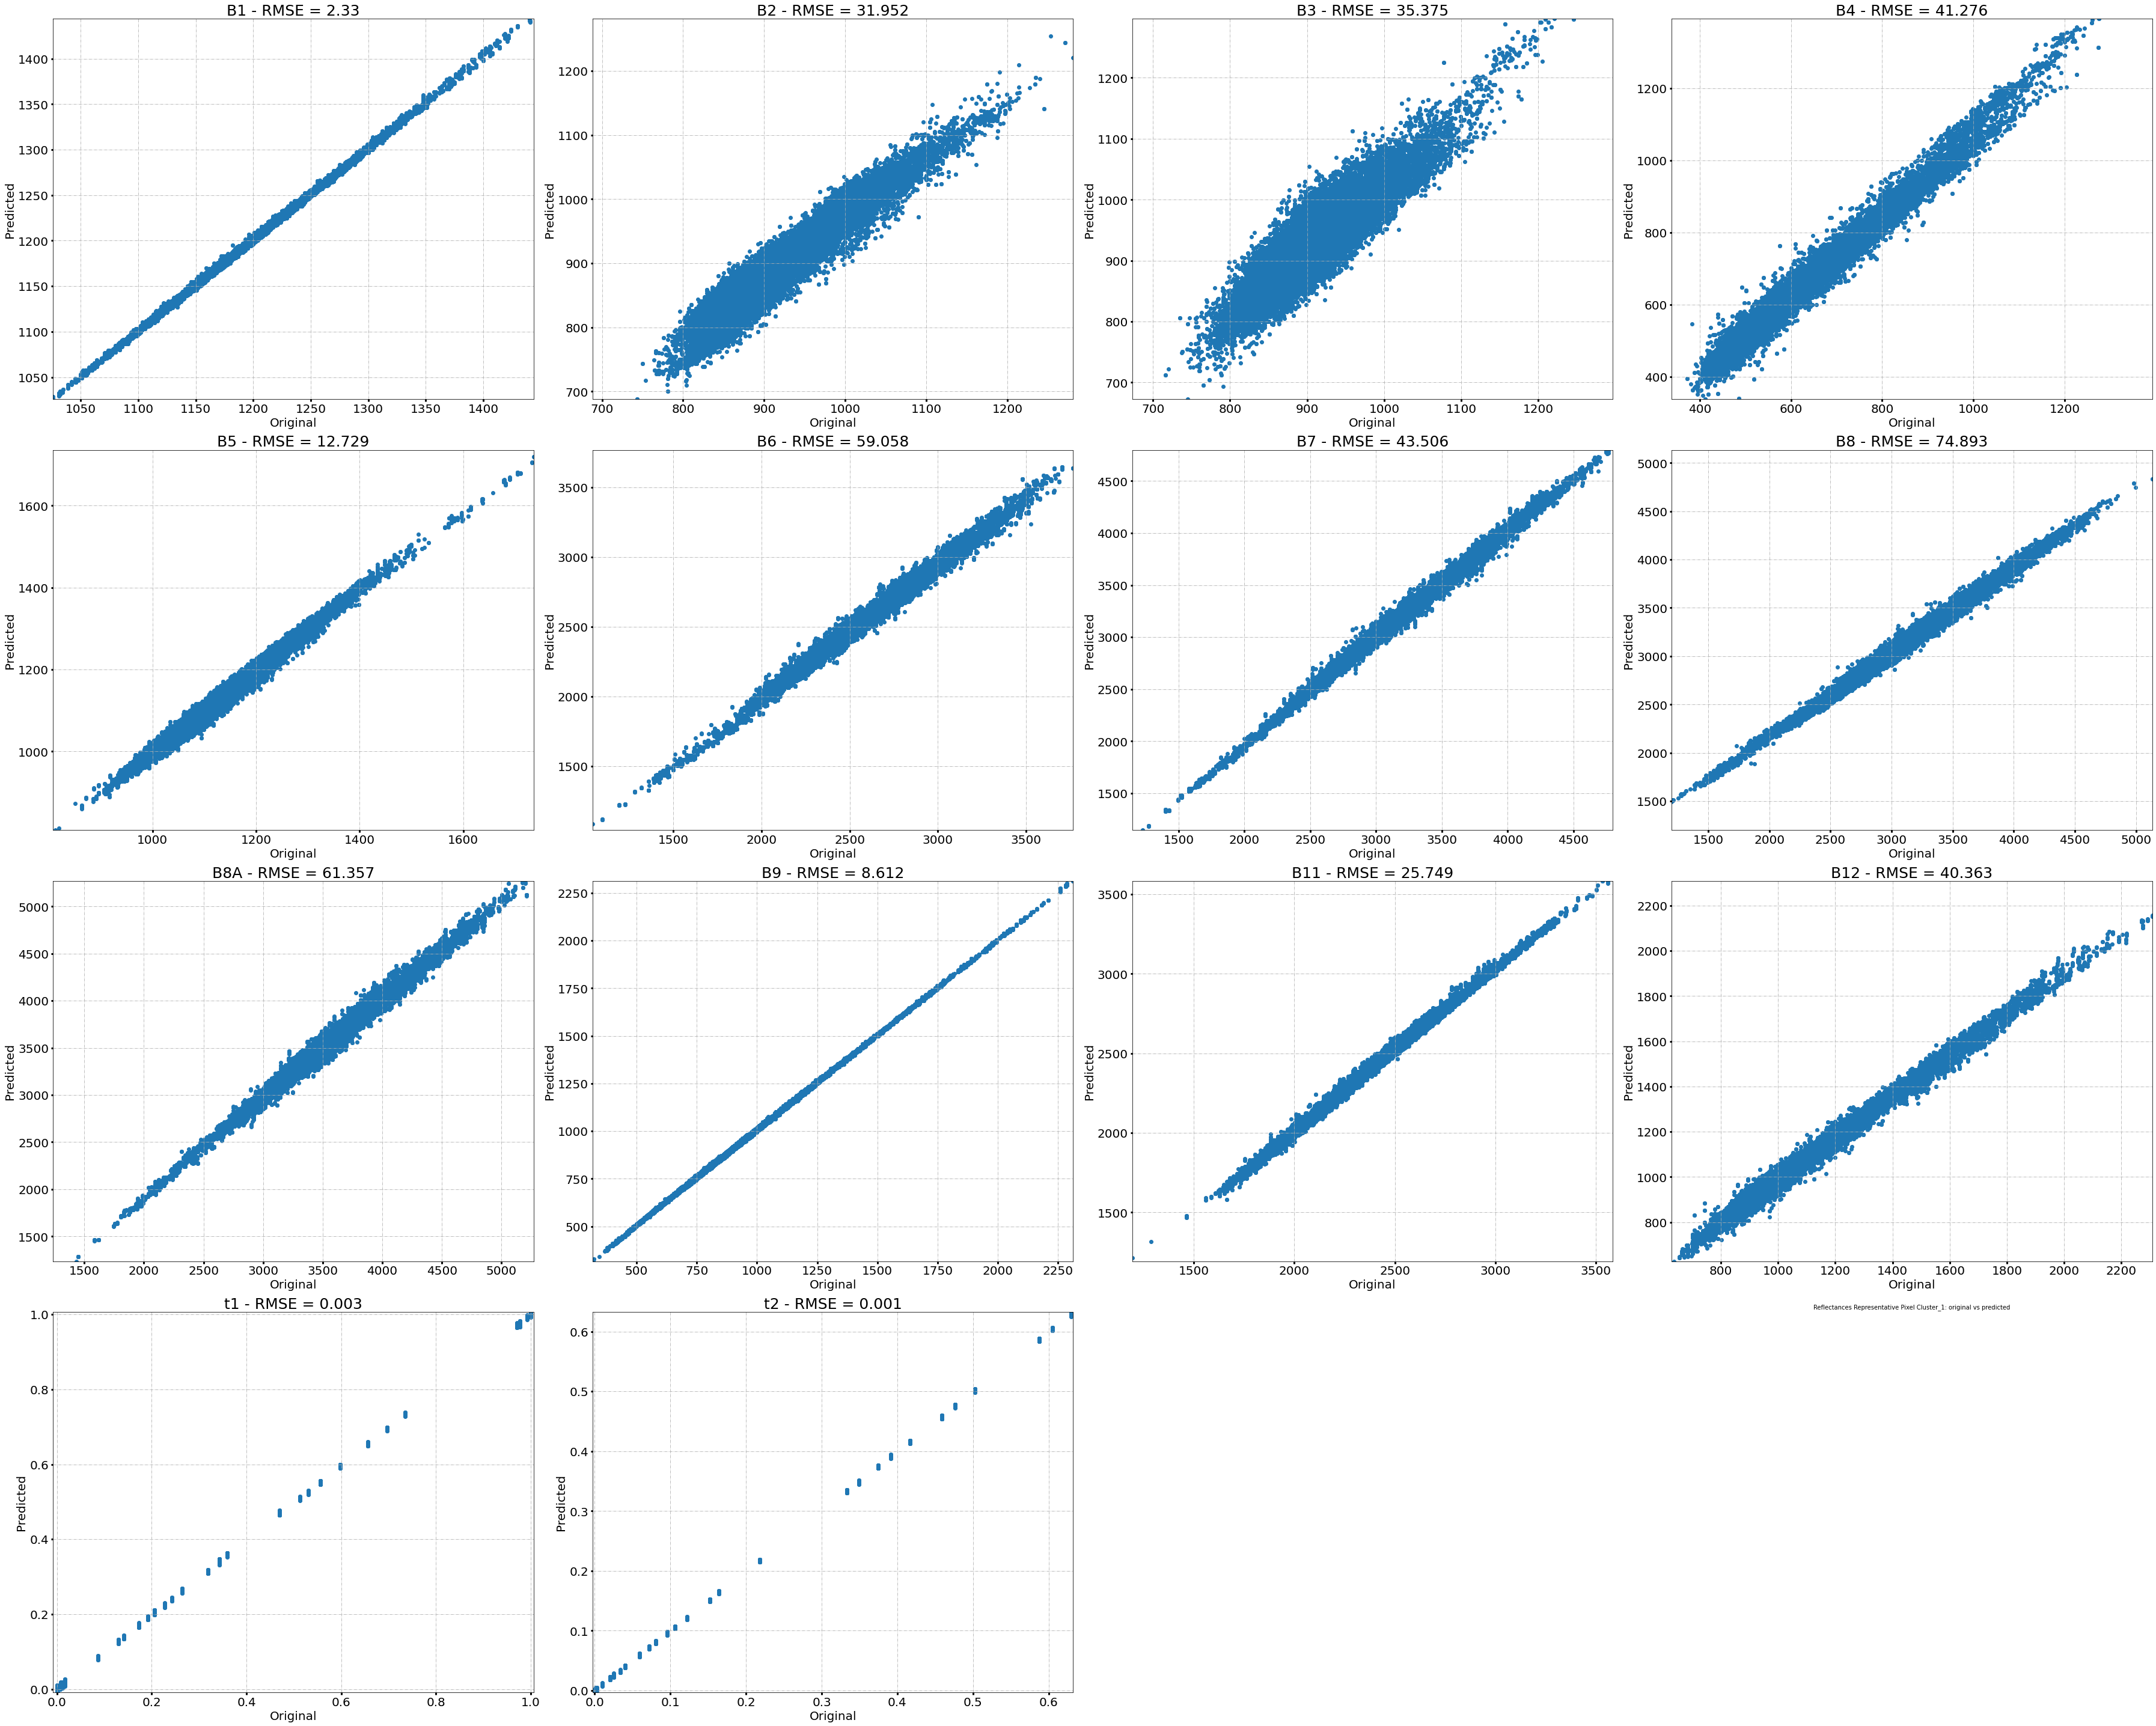

Sum RMSE all bands...
Total RMSE autoencoder 1: 437.204
-------------------------------------------------------------------------------------------
                                    CLUSTER 2 --- AUTOENCODER 2
    ------------------------------------------------------------------------------------------------------


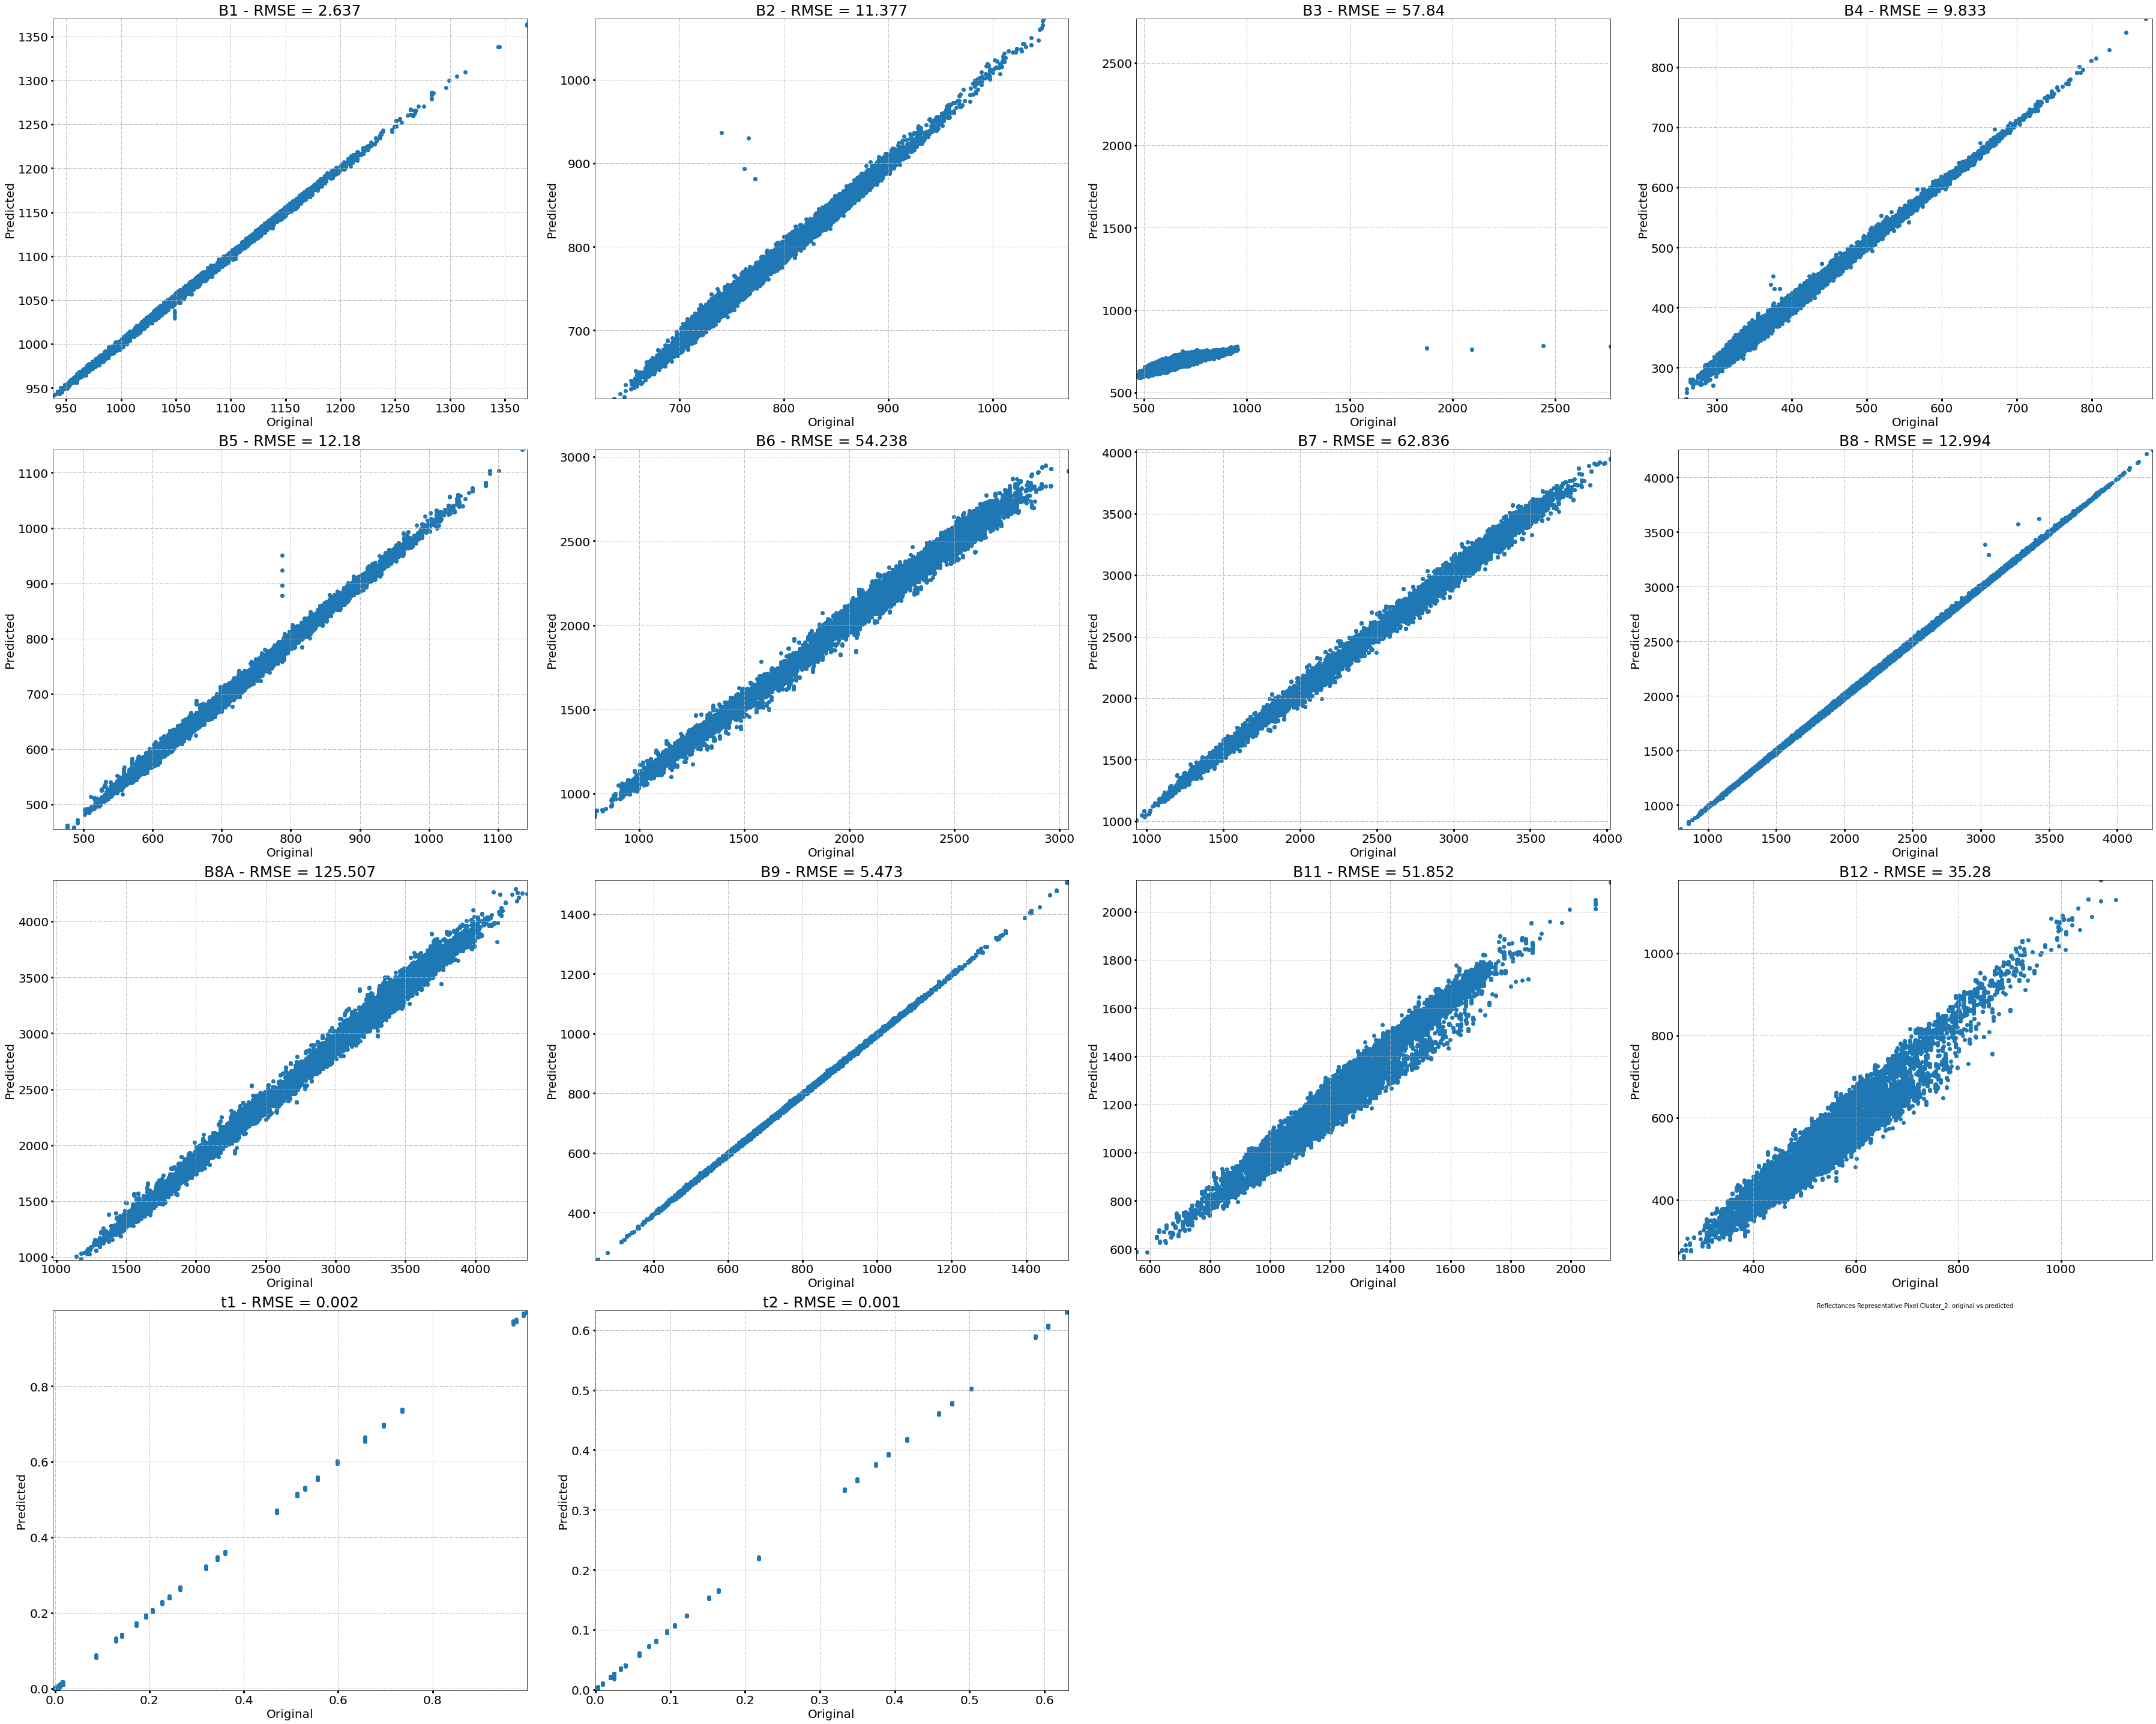

Sum RMSE all bands...
Total RMSE autoencoder 2: 442.05
-------------------------------------------------------------------------------------------
                                    CLUSTER 3 --- AUTOENCODER 3
    ------------------------------------------------------------------------------------------------------


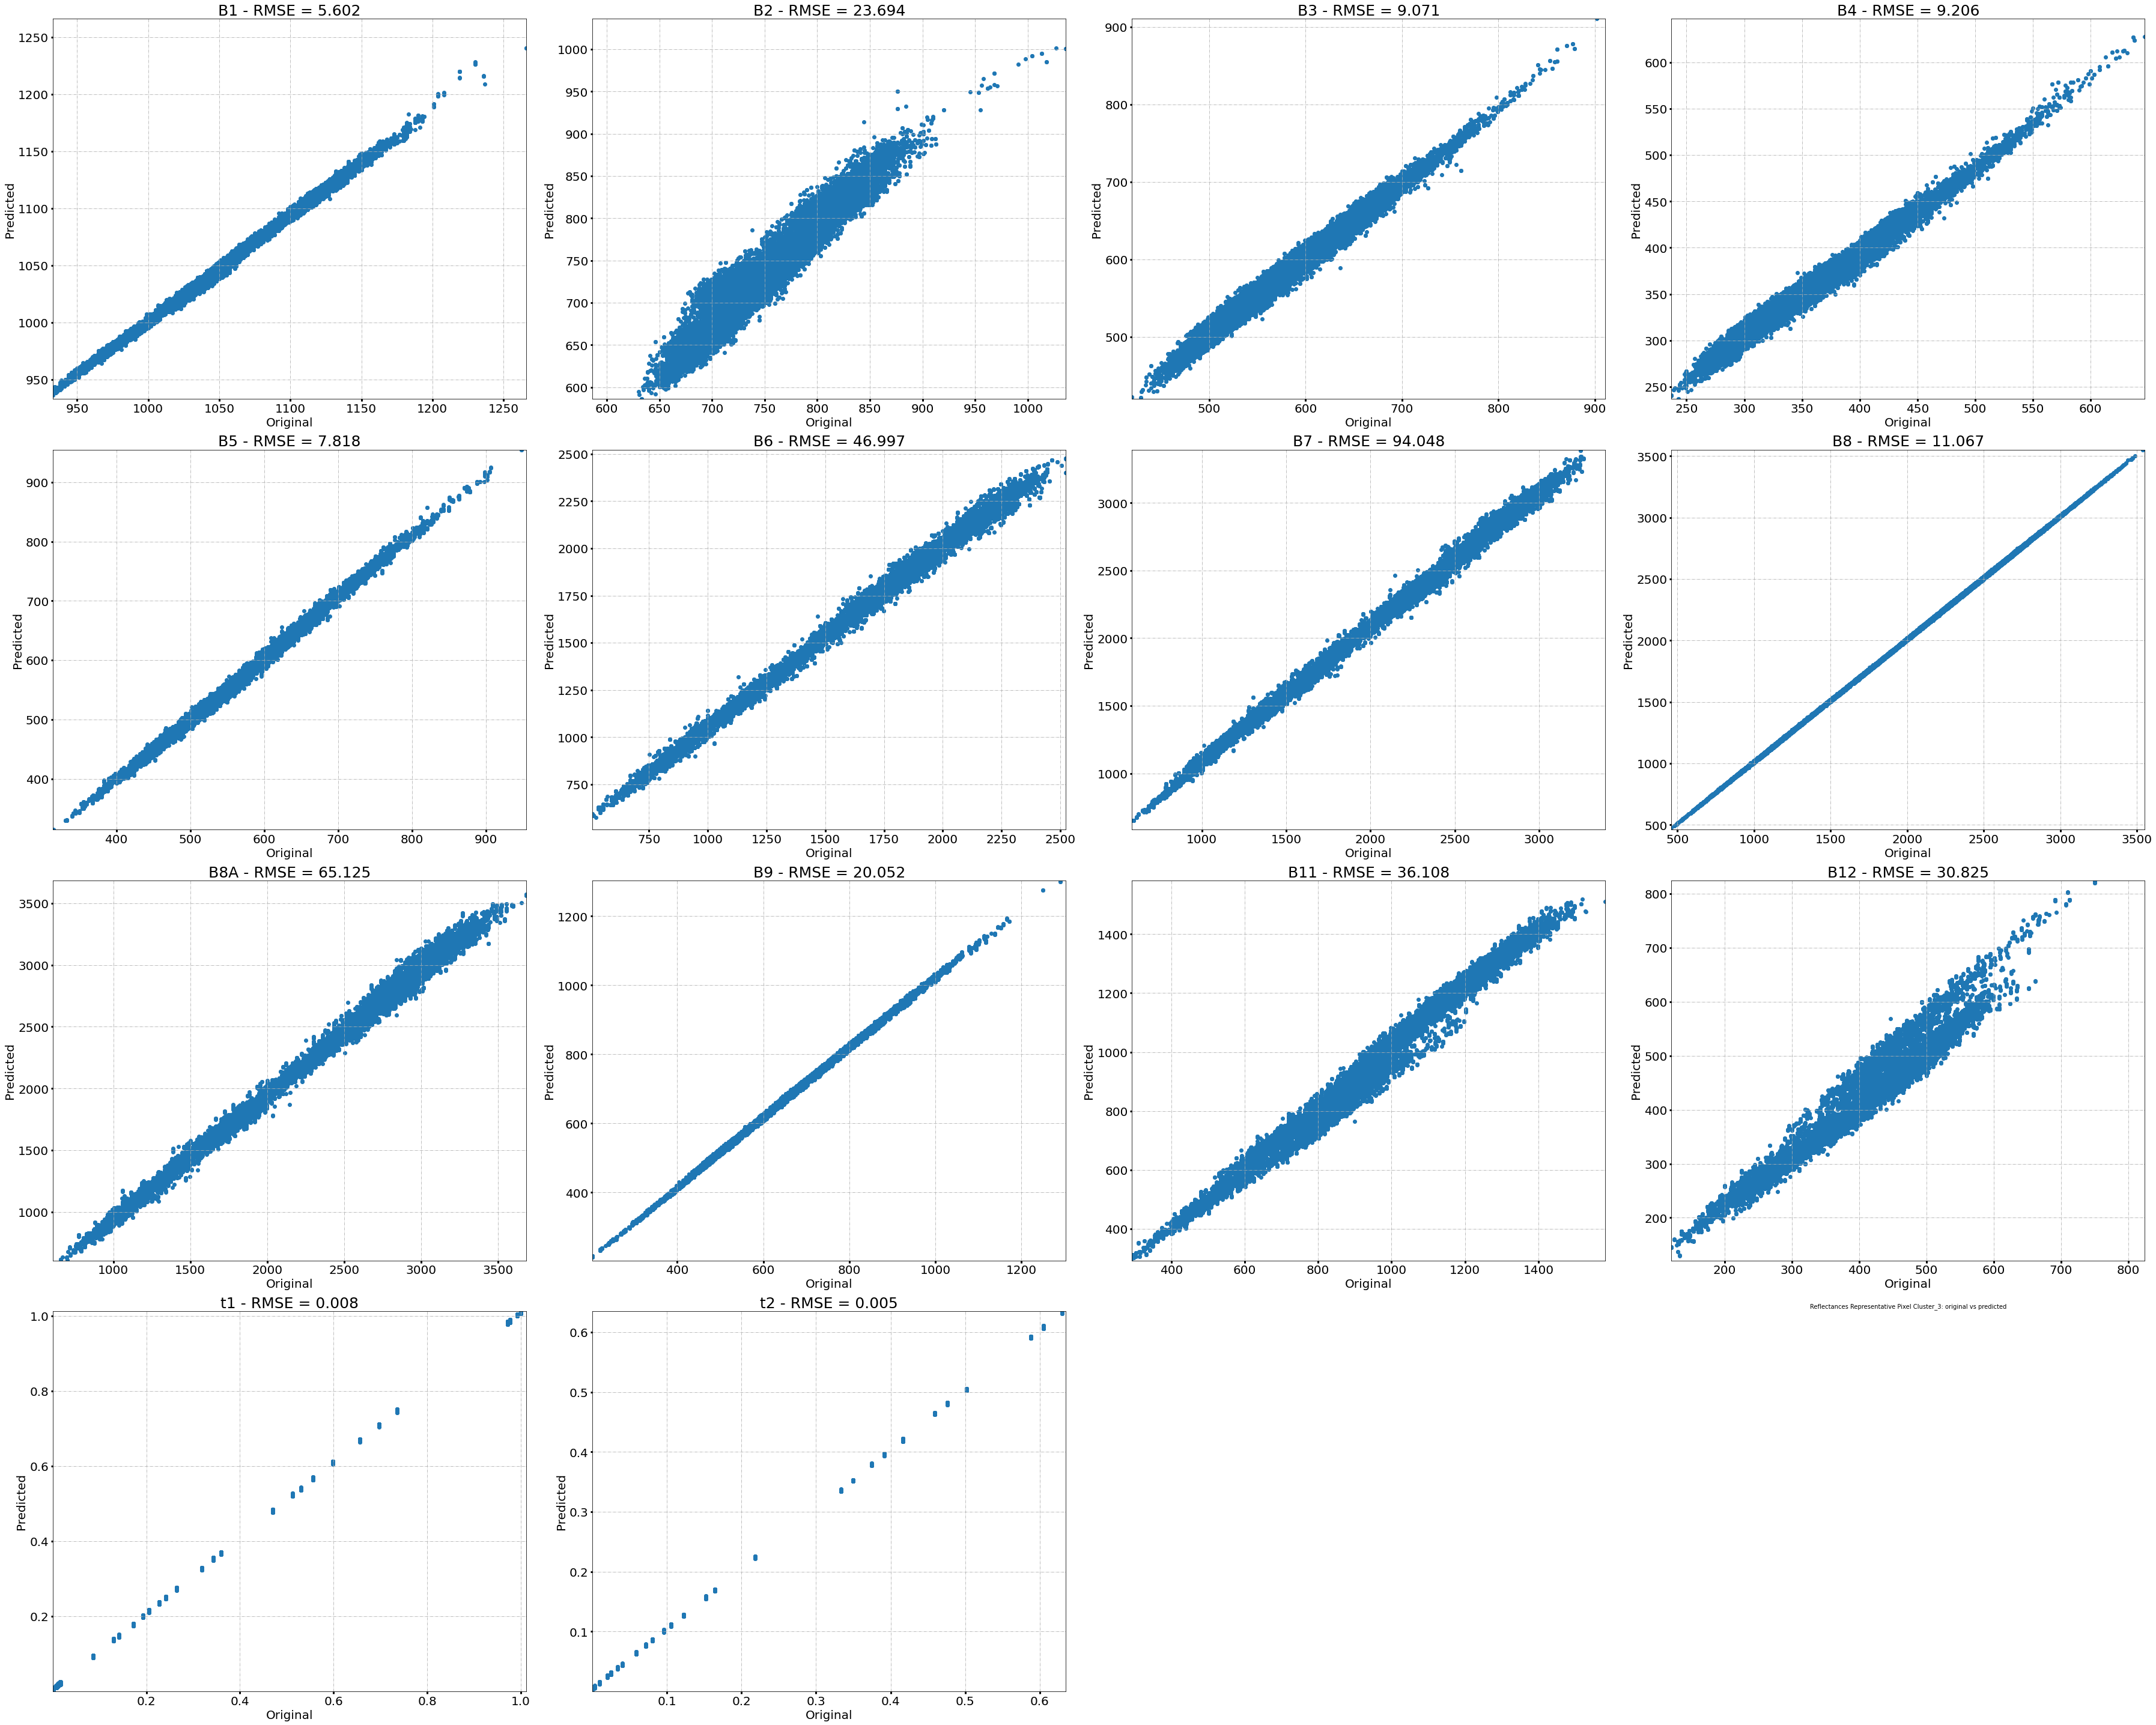

Sum RMSE all bands...
Total RMSE autoencoder 3: 359.62600000000003
-------------------------------------------------------------------------------------------
                                    CLUSTER 4 --- AUTOENCODER 4
    ------------------------------------------------------------------------------------------------------


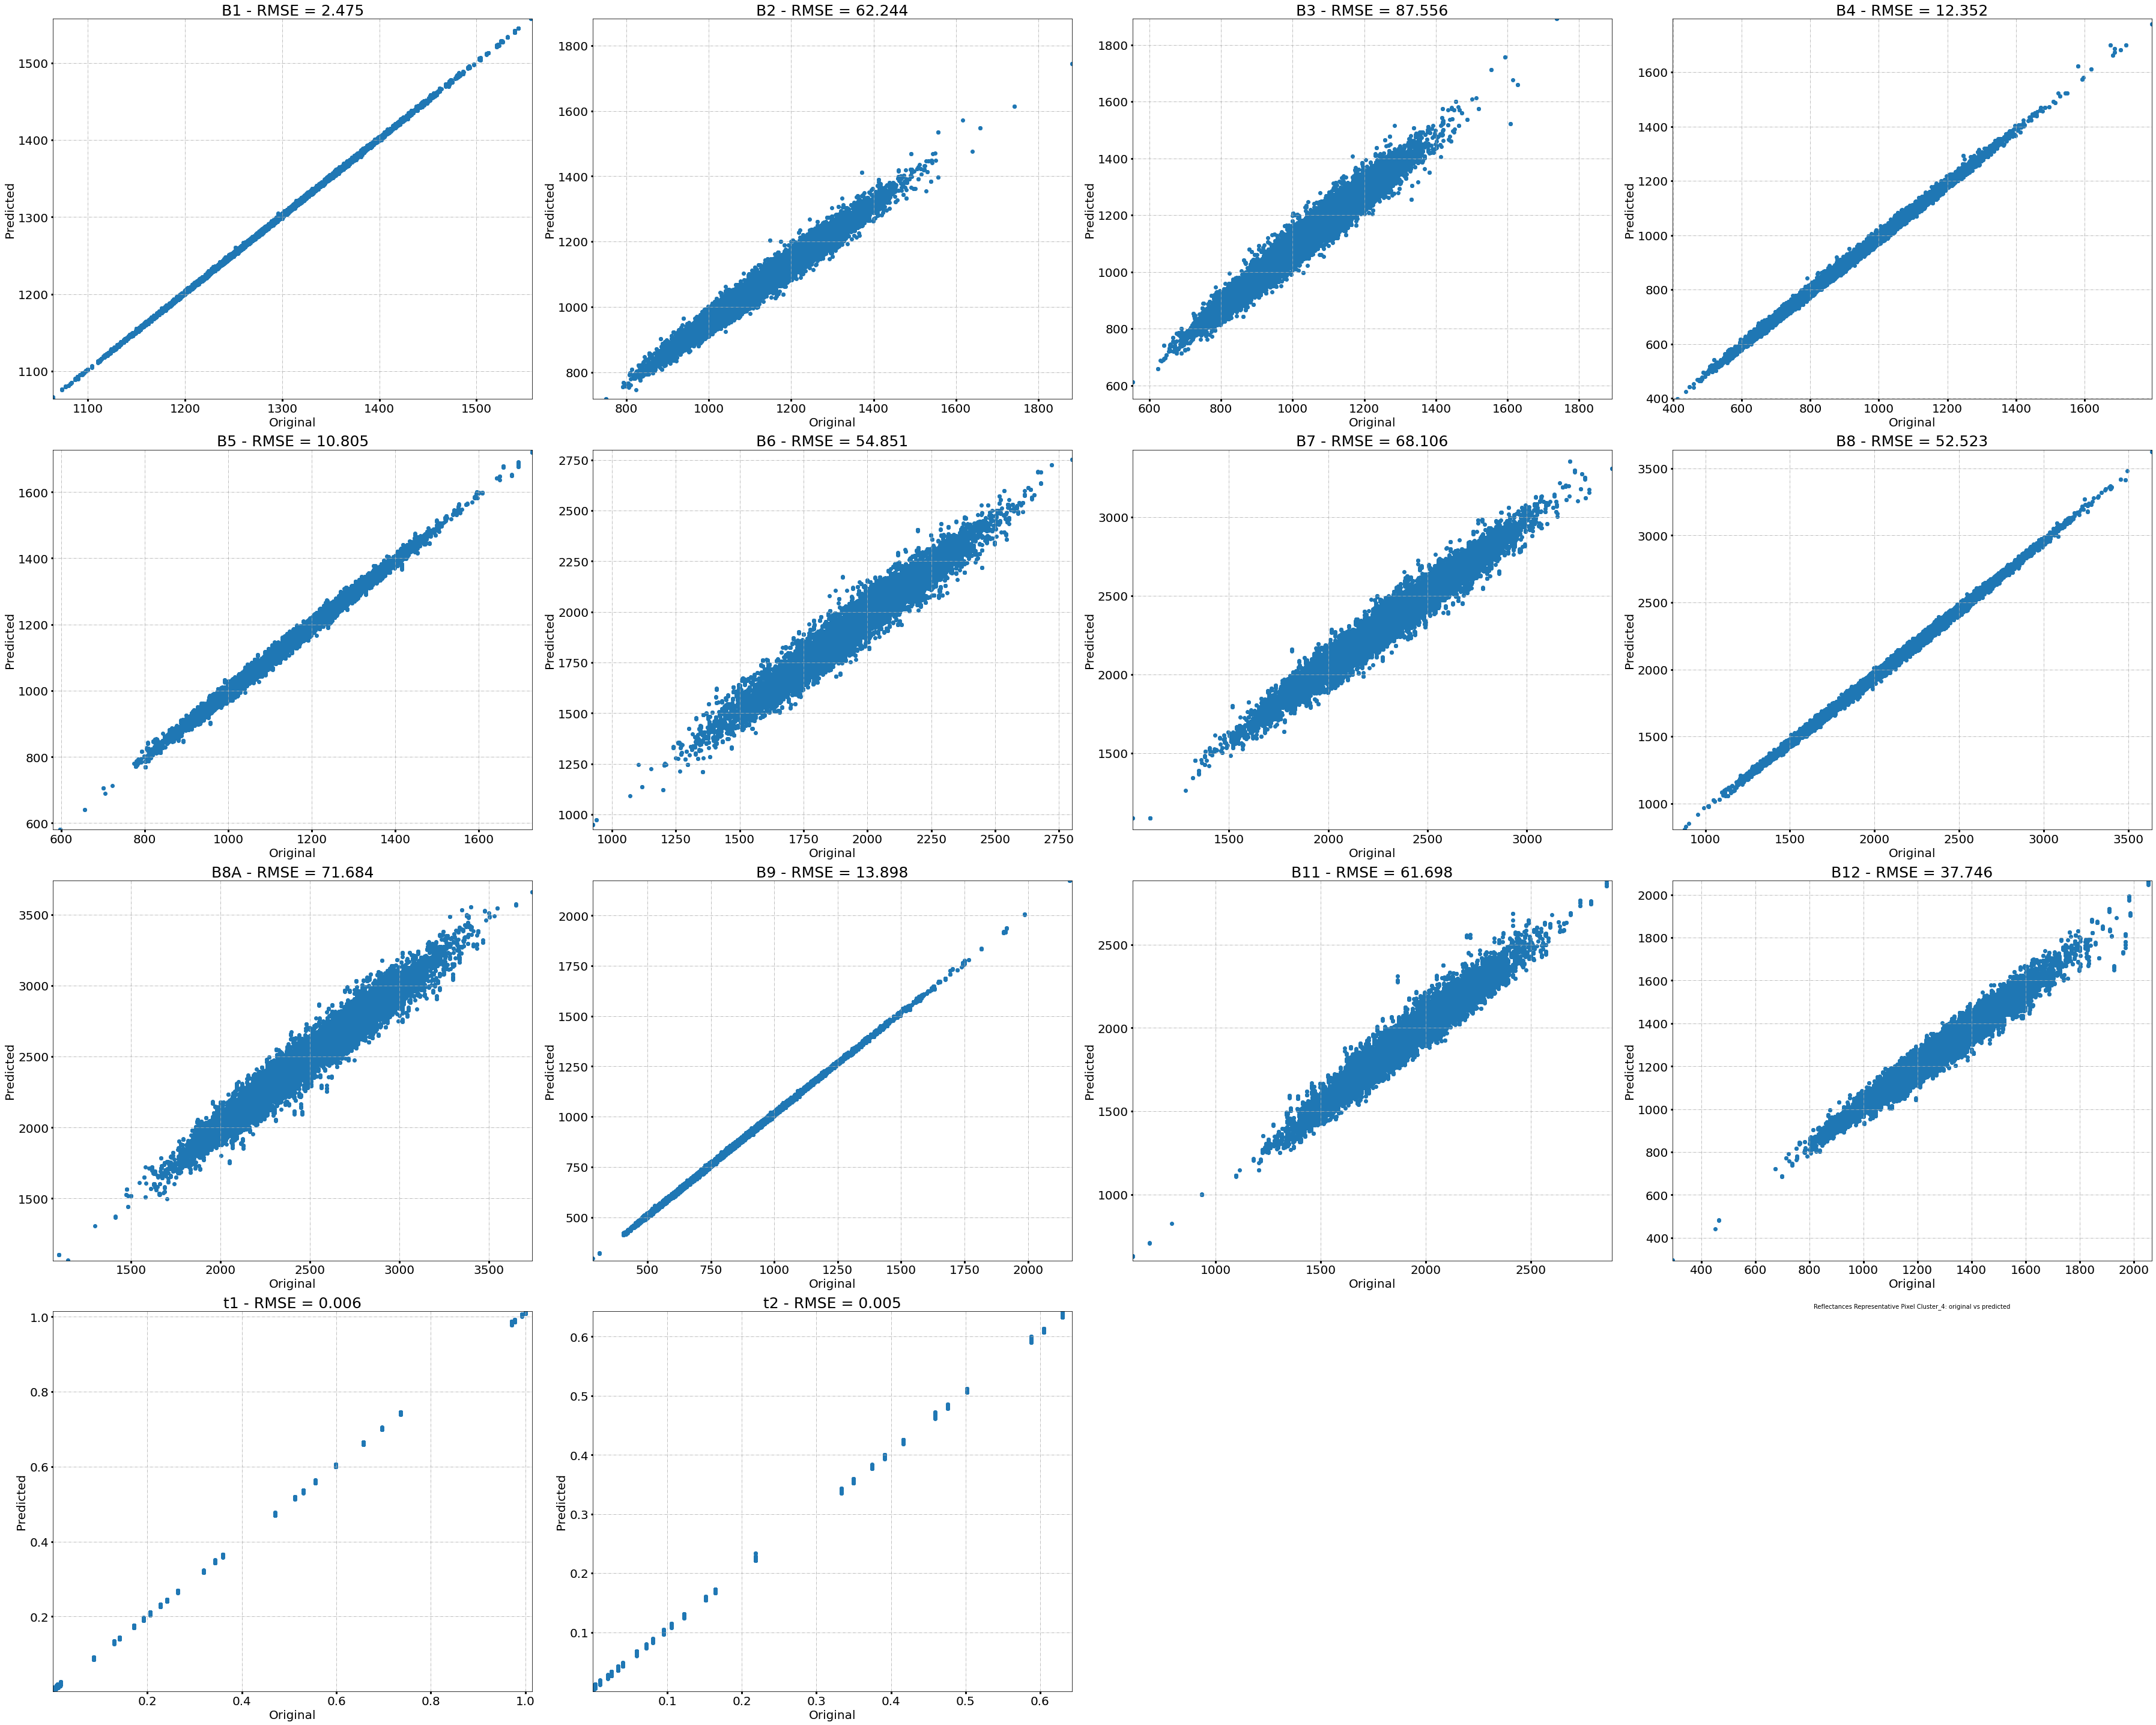

Sum RMSE all bands...
Total RMSE autoencoder 4: 535.949
-------------------------------------------------------------------------------------------
                                    CLUSTER 5 --- AUTOENCODER 5
    ------------------------------------------------------------------------------------------------------


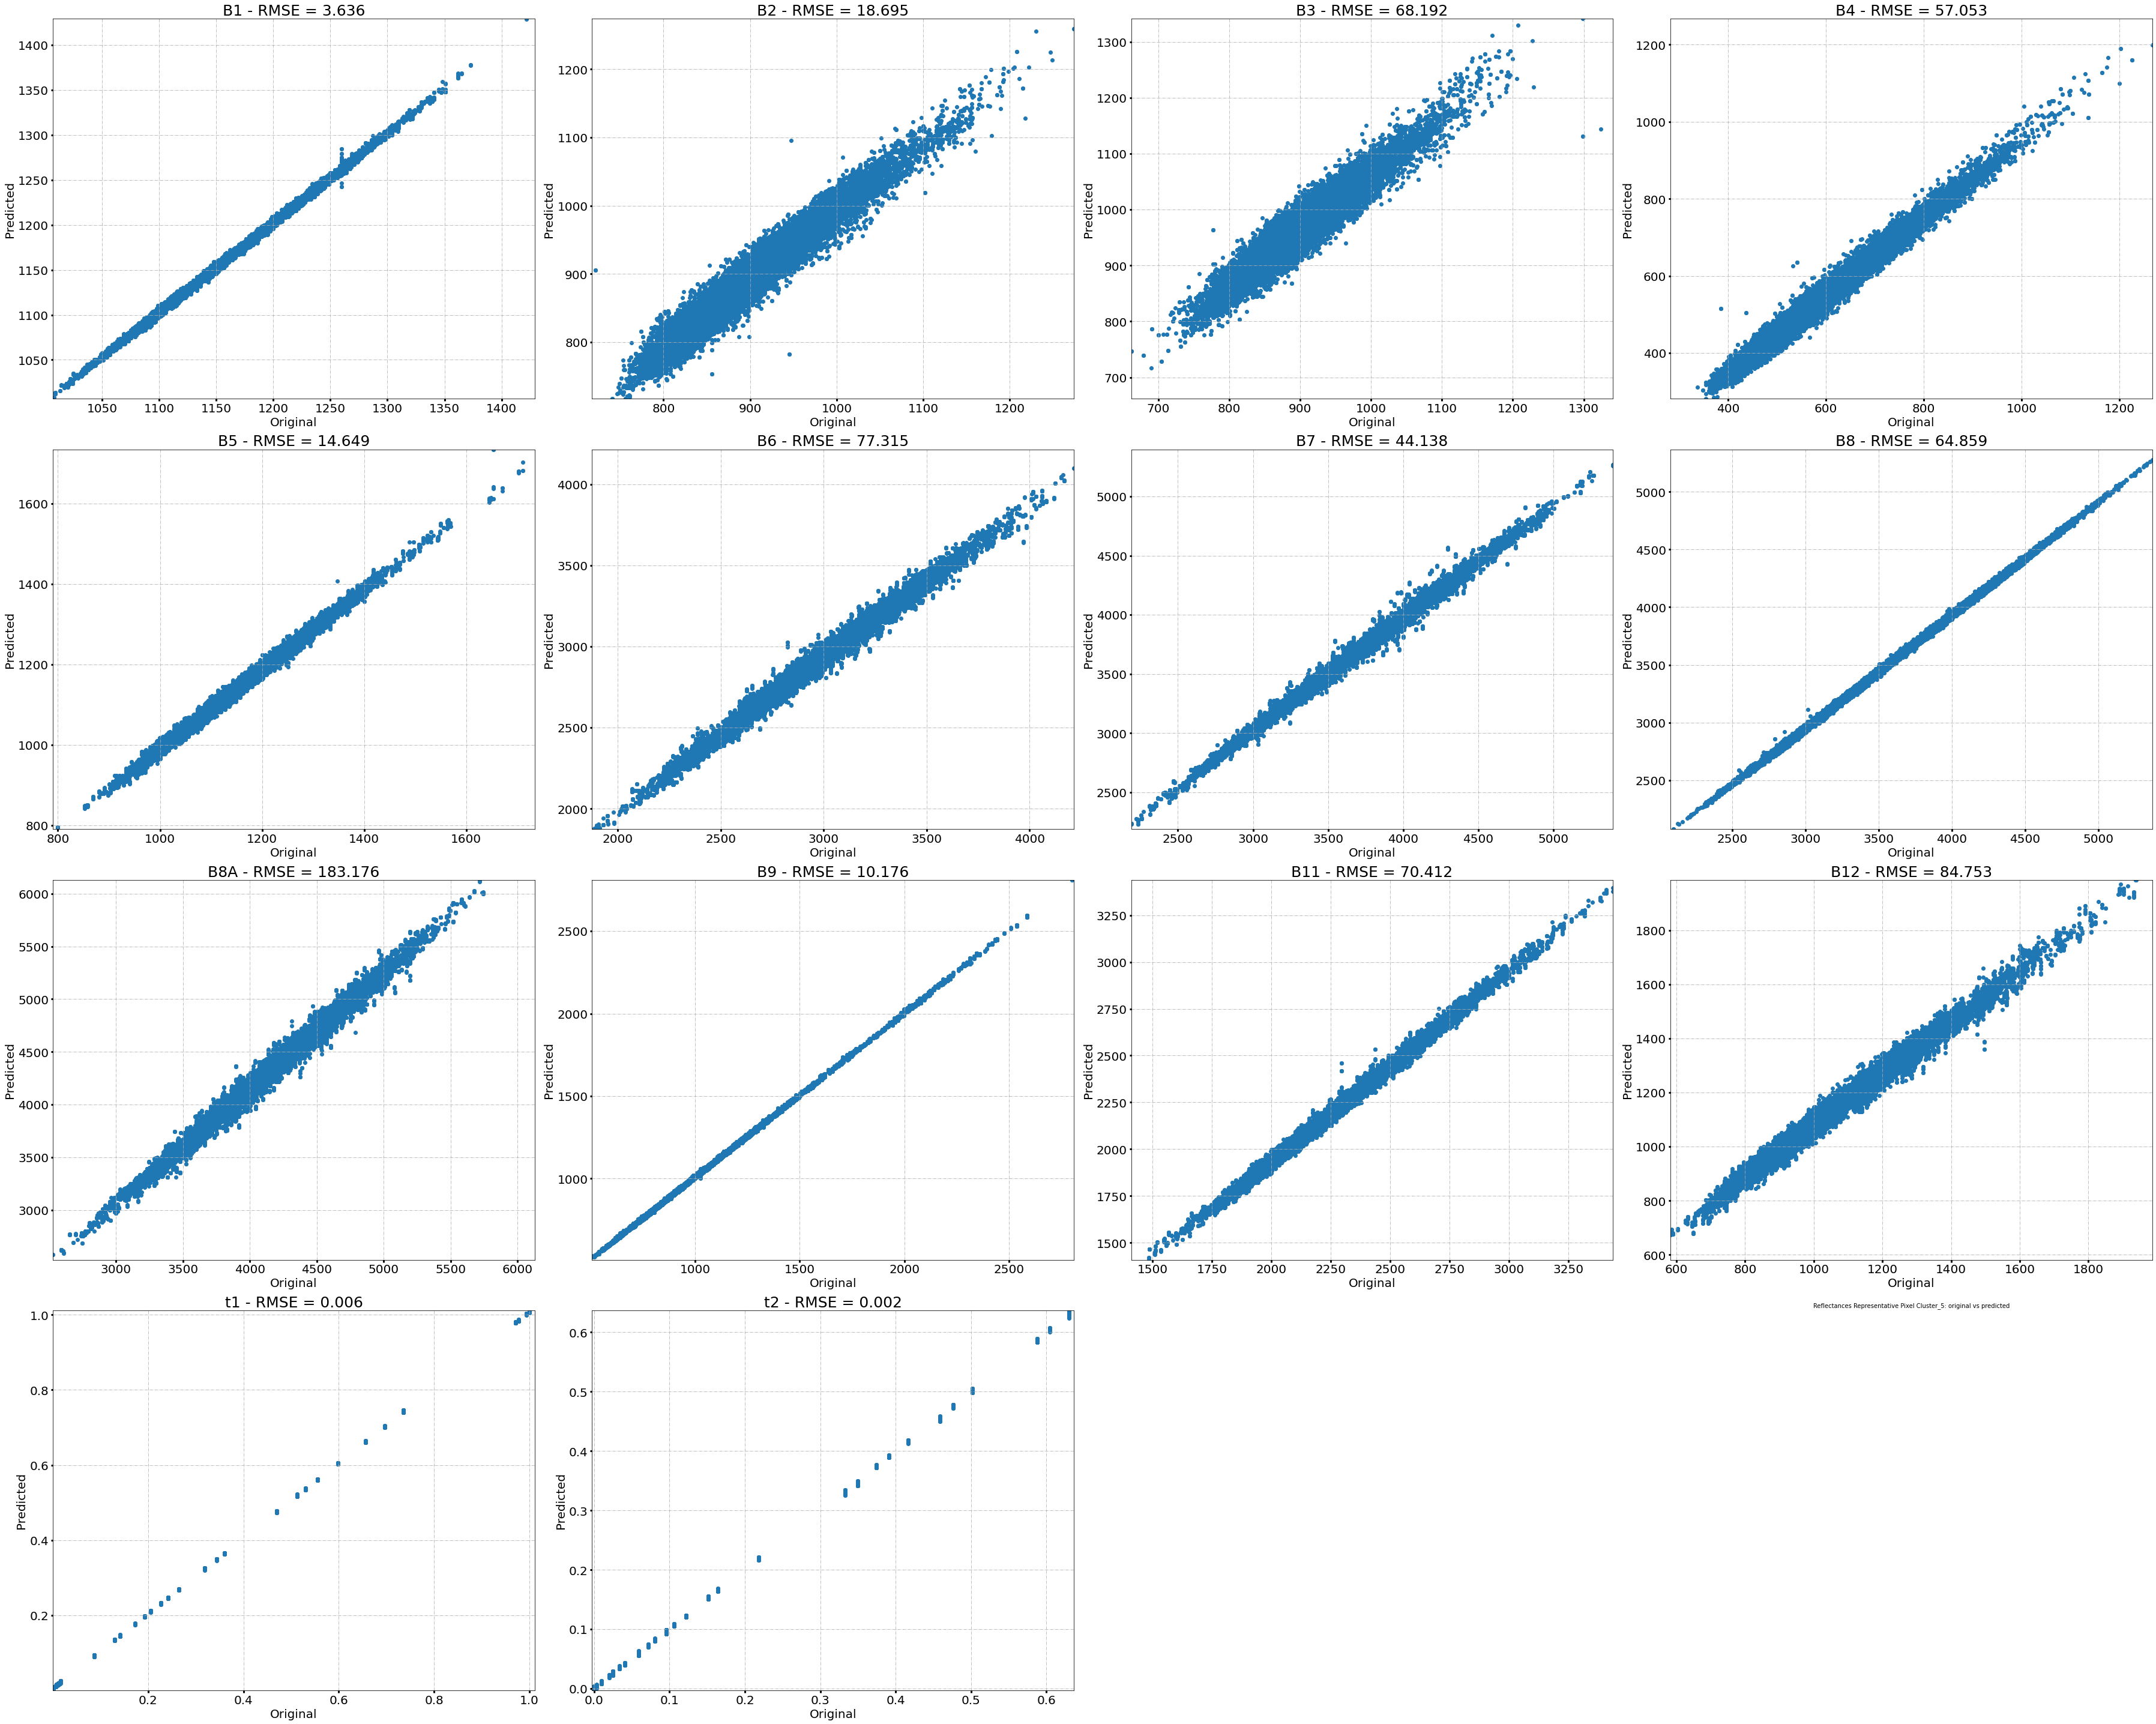

Sum RMSE all bands...
Total RMSE autoencoder 5: 697.062
-------------------------------------------------------------------------------------------
                                    CLUSTER 6 --- AUTOENCODER 6
    ------------------------------------------------------------------------------------------------------


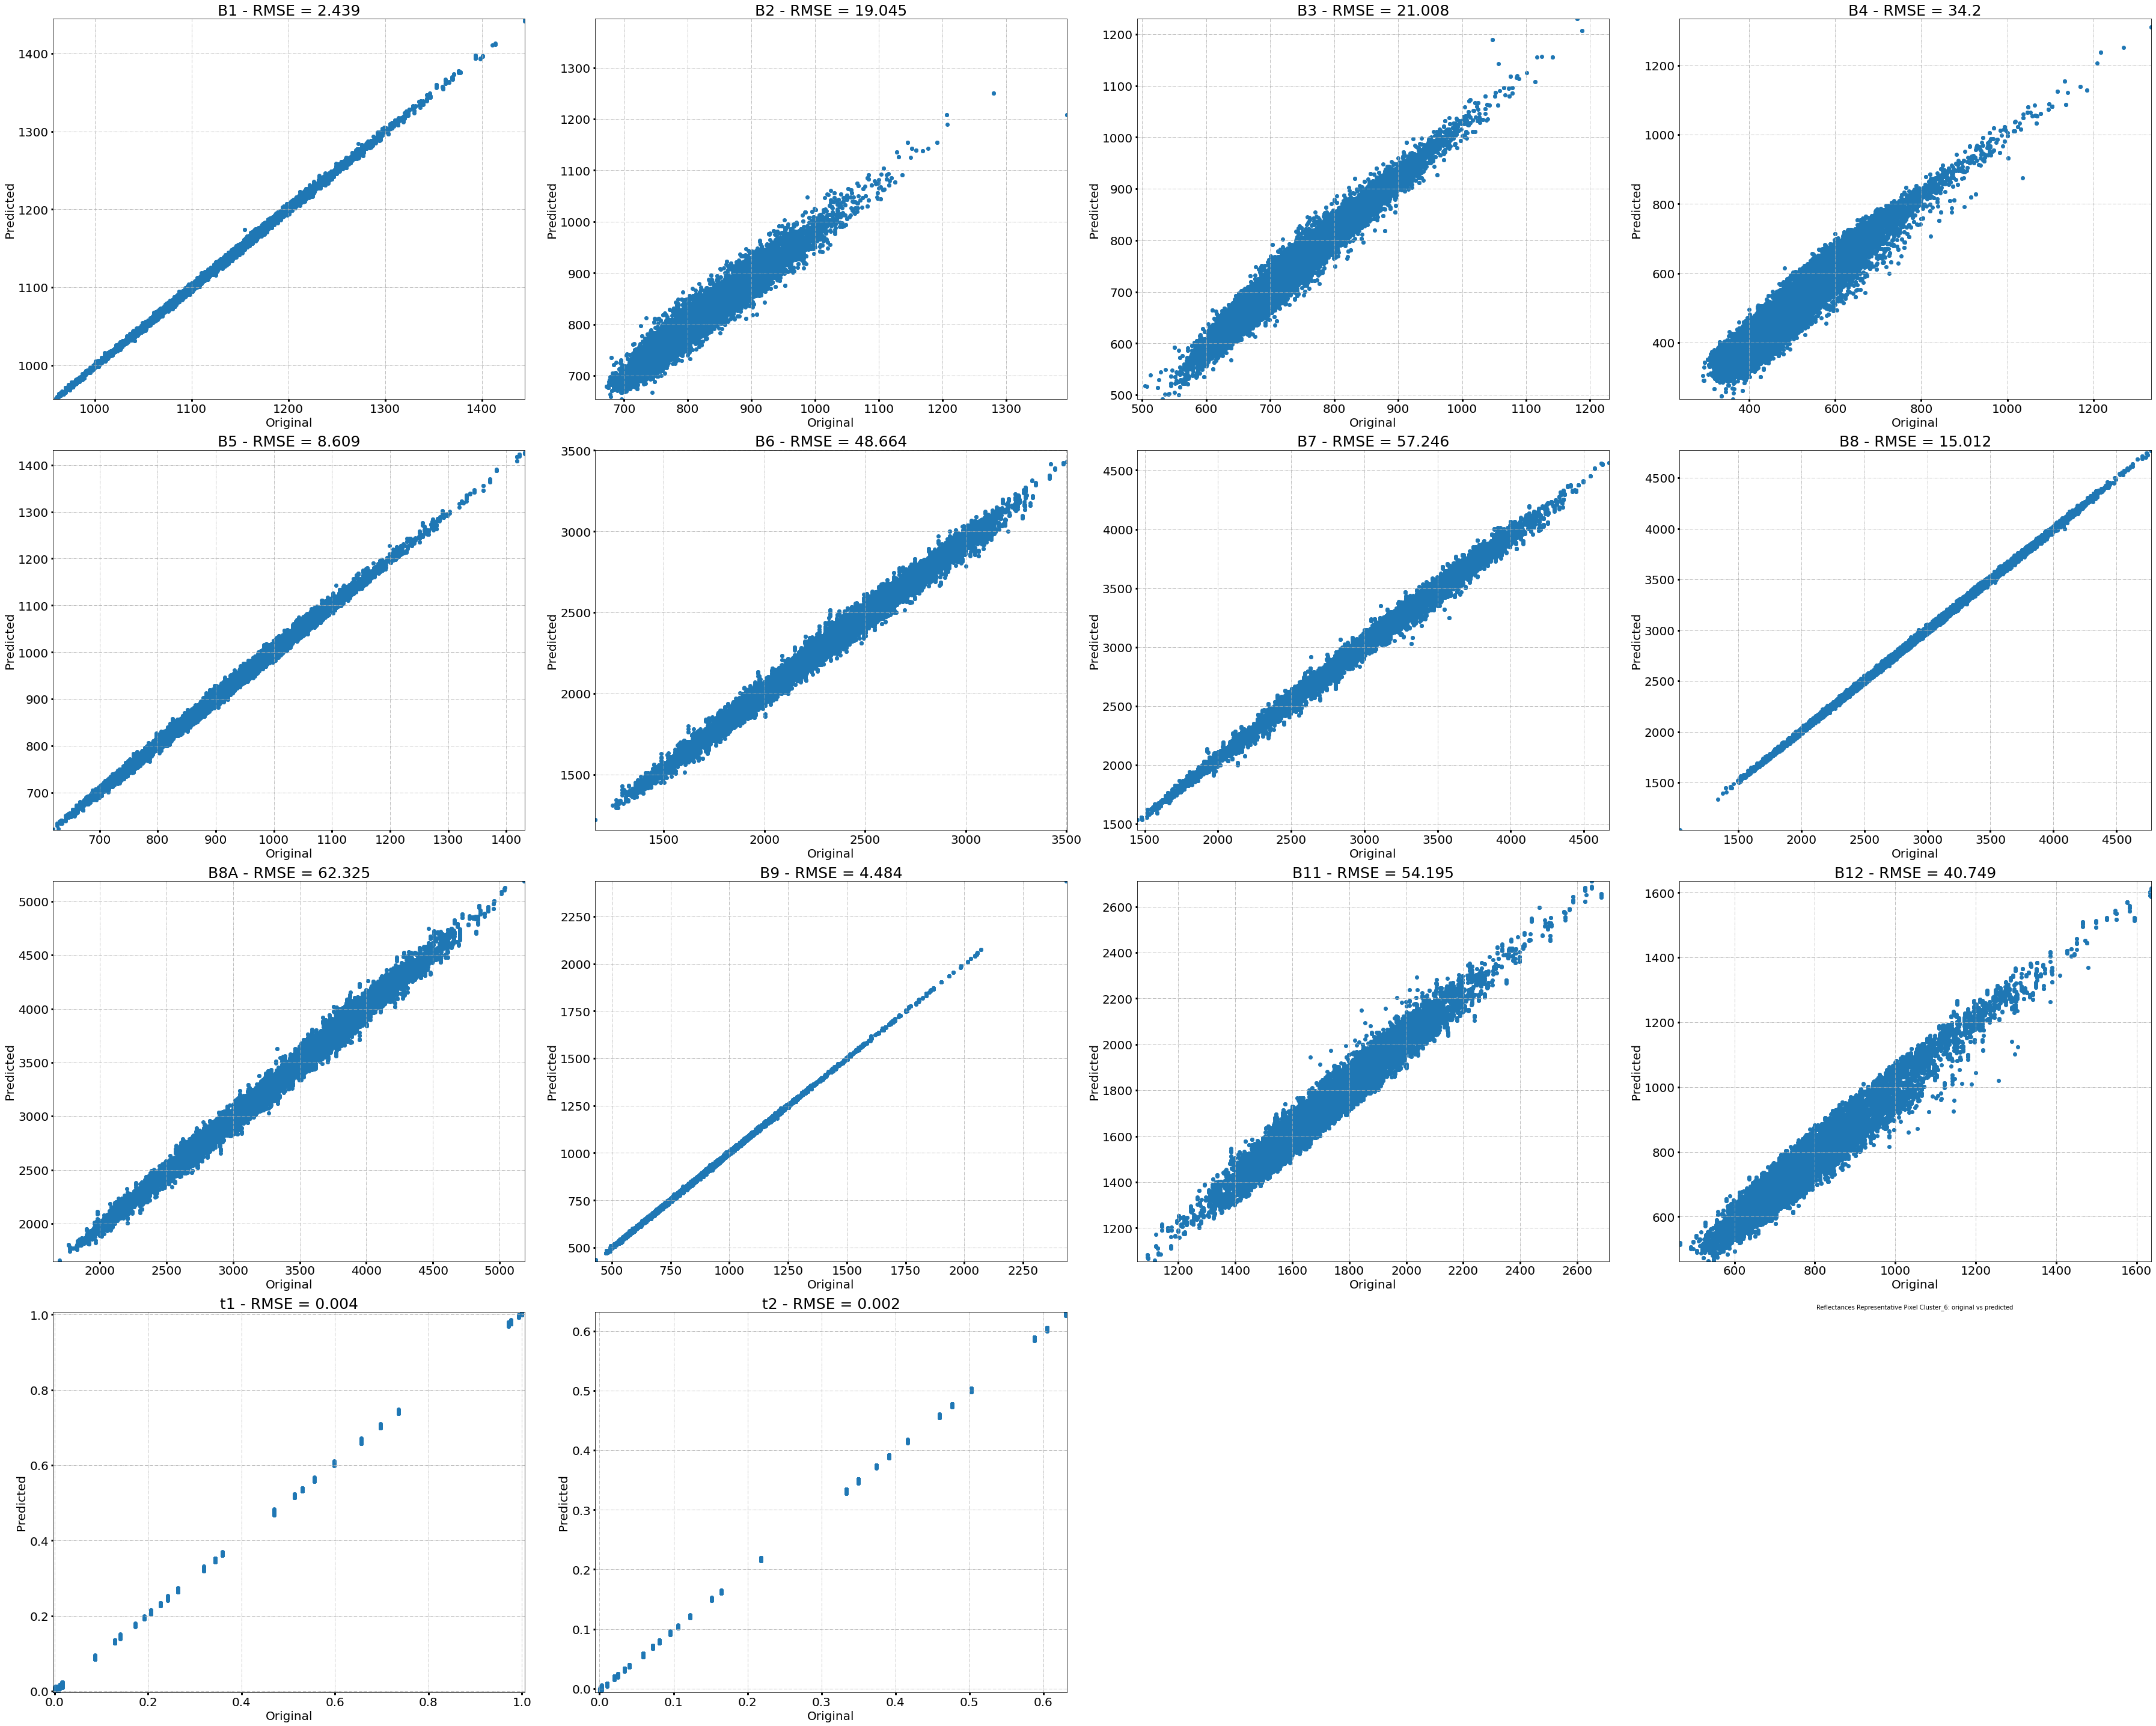

Sum RMSE all bands...
Total RMSE autoencoder 6: 367.982
-------------------------------------------------------------------------------------------
                                    CLUSTER 7 --- AUTOENCODER 7
    ------------------------------------------------------------------------------------------------------


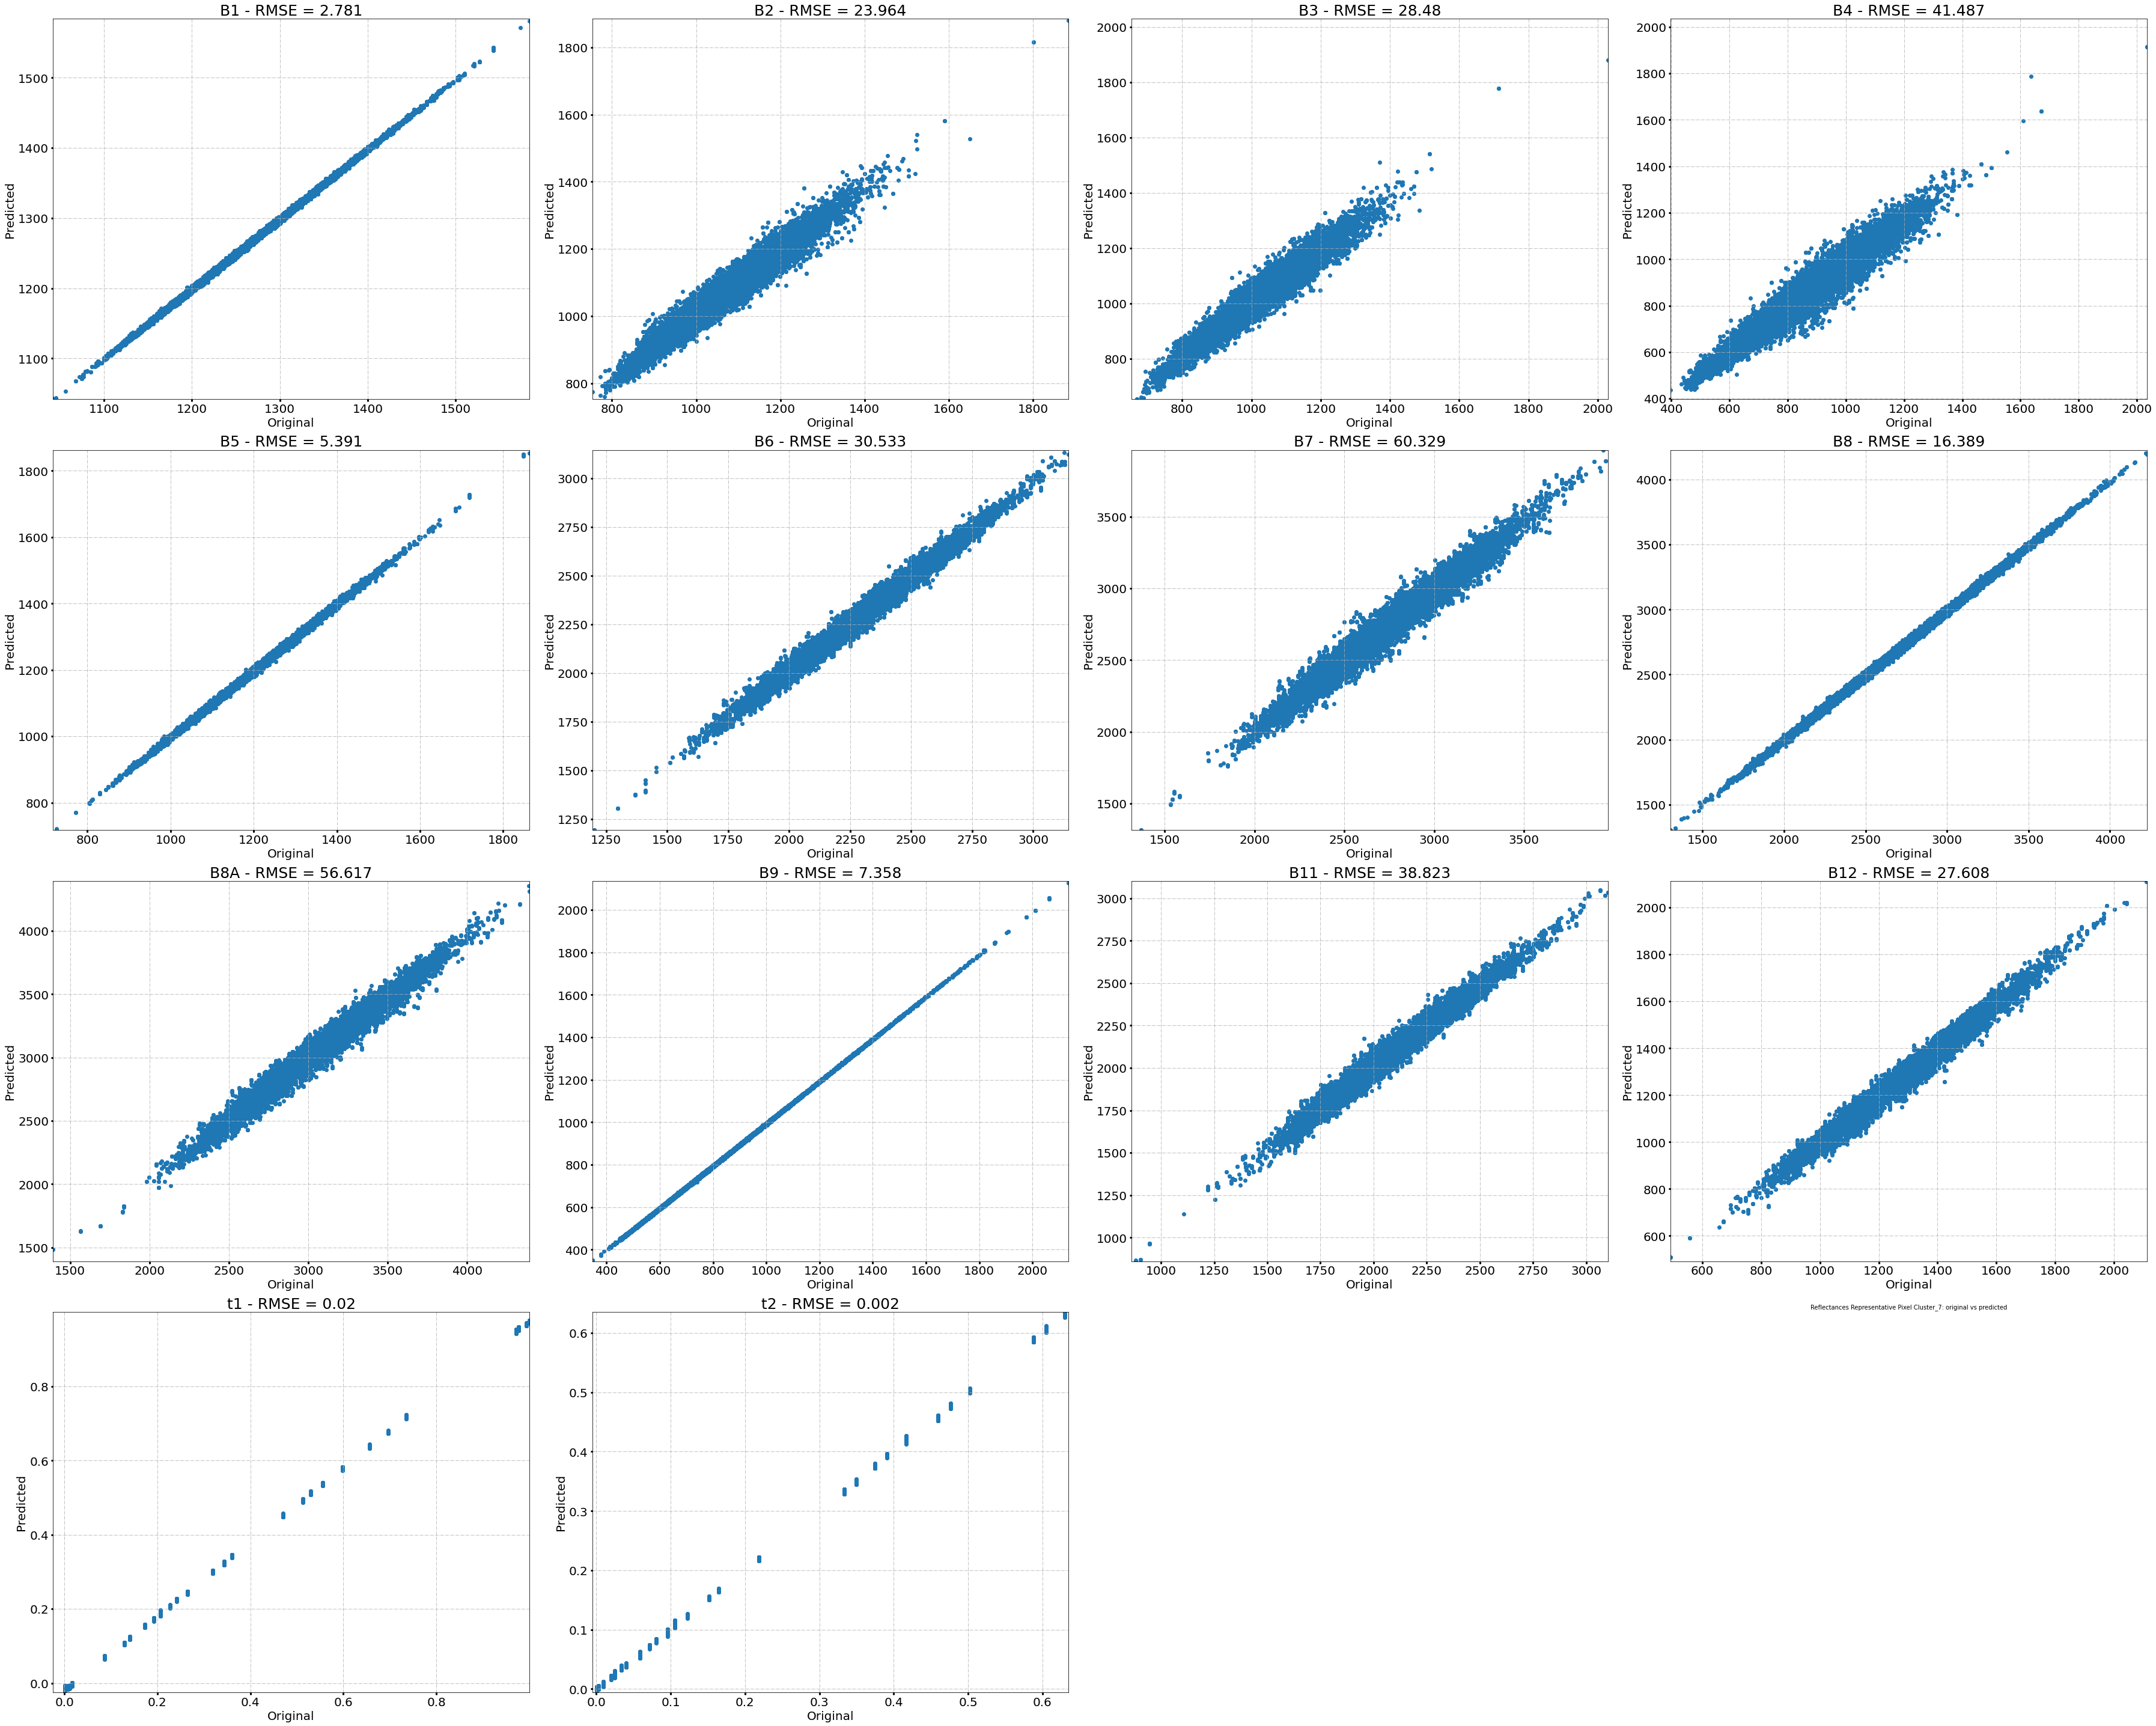

Sum RMSE all bands...
Total RMSE autoencoder 7: 339.782


In [38]:
from matplotlib.cbook import flatten
# Prepare subplots
n_figures = len(bands)
n_rows = int(math.ceil((n_figures)**(1/2))) #add an extra row to have space for the colorbar
n_cols = int(math.ceil(n_figures/n_rows))
rows=[]
columns = []
for row in range(n_rows):
    for col in range(n_cols):
        rows.append(row)
        columns.append(col)

# Show reflectances for each AE
for ae in range(n_clusters):
    print(f'''-------------------------------------------------------------------------------------------
                                    CLUSTER {ae} --- AUTOENCODER {ae}
    ------------------------------------------------------------------------------------------------------''')
    
    # Plot reflectances original pixel vs. reconstructed
    reconstruction_cluster = reconstruction[ae]
    pixels = rep_pix_allCluster[ae]
    pixel = pixels[0]
    fig, axs = plt.subplots(n_rows, n_cols, figsize= (50,40))
    rms_l = []
    
    # reflectance bands: B1, B2, B3, B4, B5
    for sp in range(n_figures):
        ori_sublist = []
        pre_sublist = []
        for pixel in pixels:
            ori_pixel = list(training[:,sp, pixel[0], pixel[1]])
            ori_sublist.append(ori_pixel)
            pre_pixel = list(reconstruction_cluster[:,sp, pixel[0], pixel[1]])
            pre_sublist.append(pre_pixel)
        #print(ori_sublist)
        #print(pre_sublist)
        ori = list(flatten(ori_sublist))
        pre = list(flatten(pre_sublist))
        rms = round(mean_squared_error(ori, pre, squared=False),3)
        rms_l.append(rms)
        ax = axs[rows[sp], columns[sp]]
        im = ax.scatter(ori, pre)
        ax.set_xlim(min(min(list(ori)), min(list(pre))), max(max(list(ori)), max(list(pre))))
        ax.set_ylim(min(min(list(ori)), min(list(pre))), max(max(list(ori)), max(list(pre))))
        ax.set_title(f'{bands[sp]} - RMSE = {rms}', fontsize=25)
        ax.set_xlabel('Original', fontsize=20)
        ax.set_ylabel('Predicted', fontsize=20)
        ax.grid(True, linestyle='-.')
        ax.tick_params(labelsize=20, width=3)
    
    # delete empty figures
    for sp in range(n_figures, n_rows*n_cols):
        axs[rows[sp], columns[sp]].set_axis_off()

    plt.title(f'Reflectances Representative Pixel Cluster_{ae}: original vs predicted', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{mf4}/OriginalvsReconstructed_AE_{ae}.png', format='png', dpi=300)
    plt.show()
    
    # print total RMSE
    print('Sum RMSE all bands...')
    print(f'Total RMSE autoencoder {ae}: {np.sum(np.array(rms_l))}')
    
    # save RMSE
    dict = {'RMSE' : np.sum(np.array(rms_l))}
    f = open( f'{model_filepath}/RMSE_pixel_training_reconstruction.txt', 'w')
    f.write( repr(dict) + '\n' )
    f.close()

# End :)